In [1]:
import pickle
import numpy as np
import pandas as pd
import statistics
import collections
from scipy.interpolate import make_interp_spline, BSpline
from scipy.stats import pearsonr,skew,kurtosis,norm
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.style as mplstyle
import matplotlib.patches as mpatches
from matplotlib.ticker import (PercentFormatter,MultipleLocator, AutoMinorLocator)
import seaborn as sns

In [2]:
with open('deltaAll.data', 'rb') as filehandle:
    df_all = pickle.load(filehandle)

In [3]:
df_NFL = df_all[df_all.Sport == 'NFL']
df_NBA = df_all[df_all.Sport == 'NBA']
df_NHL = df_all[df_all.Sport == 'NHL']
df_MLB = df_all[df_all.Sport == 'MLB']
dlpctNFL = df_NFL.longPct
dlpctNHL = df_NHL.longPct
dlpctNBA = df_NBA.longPct
dlpctMLB = df_MLB.longPct

In [4]:
# Convert to Boxplots
print('All Sports:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(df_all.longPct),int(statistics.mean(df_all.longPct)),round(statistics.mean(np.abs(df_all.longPct[:])),3)))
print('min:%s , max:%s' % (round(min(df_all.longPct),4),round(max(df_all.longPct),4)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(df_all.longPct),4),round(statistics.pvariance(df_all.longPct),4)))
print('skew:%s , kurt:%s' % (round(skew(df_all.longPct),4),round(kurtosis(df_all.longPct),4)))

print('\nMLB:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctMLB),int(statistics.mean(dlpctMLB)),round(statistics.mean(np.abs(dlpctMLB[:])),3)))
print('min:%s , max:%s' %  (round(min(dlpctMLB),4), round(max(dlpctMLB),4)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctMLB),4),round(statistics.pvariance(dlpctMLB),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctMLB),4),round(kurtosis(dlpctMLB),4)))

print('\nNFL:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNFL),int(statistics.mean(dlpctNFL)),round(statistics.mean(np.abs(dlpctNFL[:])),3)))
print('min:%s , max:%s' %  (round(min(dlpctNFL),4), round(max(dlpctNFL),4)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNFL),4),round(statistics.pvariance(dlpctNFL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNFL),4),round(kurtosis(dlpctNFL),4)))

print('\nNHL:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNHL),int(statistics.mean(dlpctNHL)),round(statistics.mean(np.abs(dlpctNHL[:])),3)))
print('min:%s , max:%s' % (round(min(dlpctNHL),4),round(max(dlpctNHL),4)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNHL),4),round(statistics.pvariance(dlpctNHL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNHL),4),round(kurtosis(dlpctNHL),4)))

print('\nNBA:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNBA),int(statistics.mean(dlpctNBA)),round(statistics.mean(np.abs(dlpctNBA[:])),3)))
print('min:%s , max:%s' % (round(min(dlpctNBA),4),round(max(dlpctNBA),4)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNBA),4),round(statistics.pvariance(dlpctNBA),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNBA),4),round(kurtosis(dlpctNBA),4)))

All Sports:
cnt:5458 , avg:0, avg mag:0.069
min:-0.5385 , max:0.5769
stdv:0.0992 , vrnc:0.0098
skew:-0.0483 , kurt:2.516

MLB:
cnt:1414 , avg:0, avg mag:0.082
min:-0.5385 , max:0.5769
stdv:0.1134 , vrnc:0.0129
skew:0.0347 , kurt:1.8955

NFL:
cnt:1509 , avg:0, avg mag:0.076
min:-0.5 , max:0.4643
stdv:0.1087 , vrnc:0.0118
skew:-0.1224 , kurt:2.1991

NHL:
cnt:1217 , avg:0, avg mag:0.062
min:-0.4333 , max:0.4667
stdv:0.0901 , vrnc:0.0081
skew:-0.019 , kurt:2.5454

NBA:
cnt:1318 , avg:0, avg mag:0.053
min:-0.3667 , max:0.2759
stdv:0.077 , vrnc:0.0059
skew:-0.124 , kurt:1.9692


In [5]:
nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x0 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y0 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNFL),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNFL),4) # standard deviation of distribution
y0 = norm.pdf(x0, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [6]:
nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x1 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y1 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNBA),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNBA),4) # standard deviation of distribution
y1 = norm.pdf(x1, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [7]:
nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x2 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y2 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNHL),4) # mean of distr`ibution
sigma = round(statistics.pstdev(dlpctNHL),4) # standard deviation of distribution
y2 = norm.pdf(x2, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [8]:
nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x3 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y3 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctMLB),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctMLB),4) # standard deviation of distribution
y3 = norm.pdf(x3, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [9]:
nx, xbins, ptchs = plt.hist(df_all.longPct,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in df_all.longPct:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(df_all.longPct,2*len((set(df_all.longPct))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x4 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y4 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(df_all.longPct),4) # mean of distr`ibution
sigma = round(statistics.pstdev(df_all.longPct),4) # standard deviation of distribution
y4 = norm.pdf(x4, mu, sigma)

<Figure size 432x288 with 0 Axes>

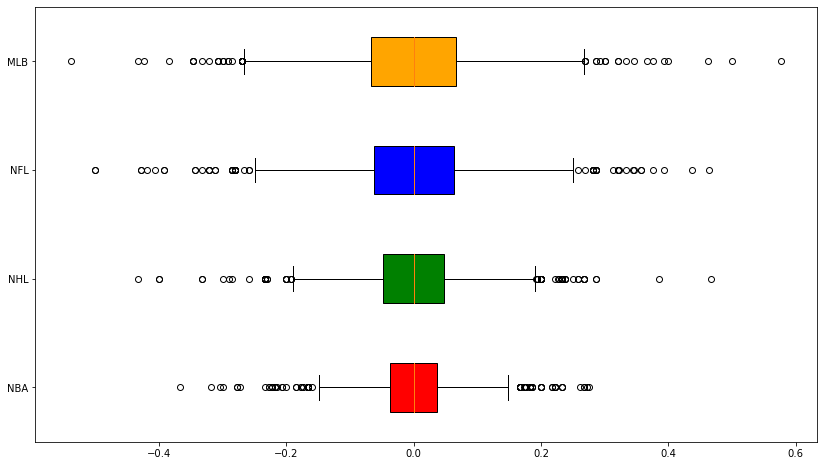

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

box_plot_data=[dlpctNBA,dlpctNHL,dlpctNFL,dlpctMLB]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['NBA','NHL','NFL','MLB'],)

colors = ['red', 'green', 'blue', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

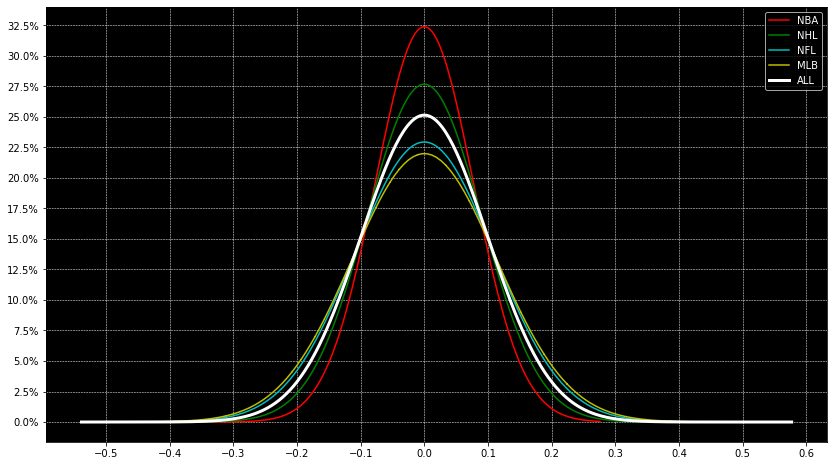

In [11]:
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'k'
plt.rcParams['savefig.facecolor'] = 'k'
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.grid'] = 'True'
plt.rcParams['grid.color'] = 'w'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = '.5'
fig, ax = plt.subplots(figsize=(14, 8))
nfl, = plt.plot(x0, y0, 'c-',label='NFL')
nba, = plt.plot(x1, y1, 'r-',label='NBA')
nhl, = plt.plot(x2, y2, 'g-',label='NHL')
mlb, = plt.plot(x3, y3, 'y-',label='MLB')
com, = plt.plot(x4, y4, 'w-',lw = 3,label='ALL')
plt.legend(handles=[nba,nhl,nfl,mlb,com])
ax.yaxis.set_major_formatter(PercentFormatter(16))
ax.yaxis.set_major_locator(MultipleLocator(.4))
ax.xaxis.set_major_locator(MultipleLocator(.1))

In [12]:
plt.clf()
plt.close()
sns.set_style("whitegrid")

In [13]:
HIST_BINS = np.linspace(-.60, .60, 38)

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

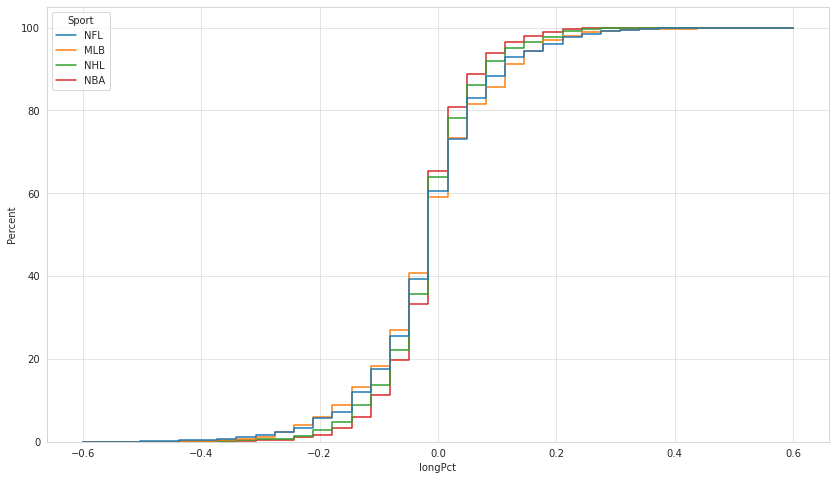

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,common_bins=False,fill=False,cumulative=True,element='step')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

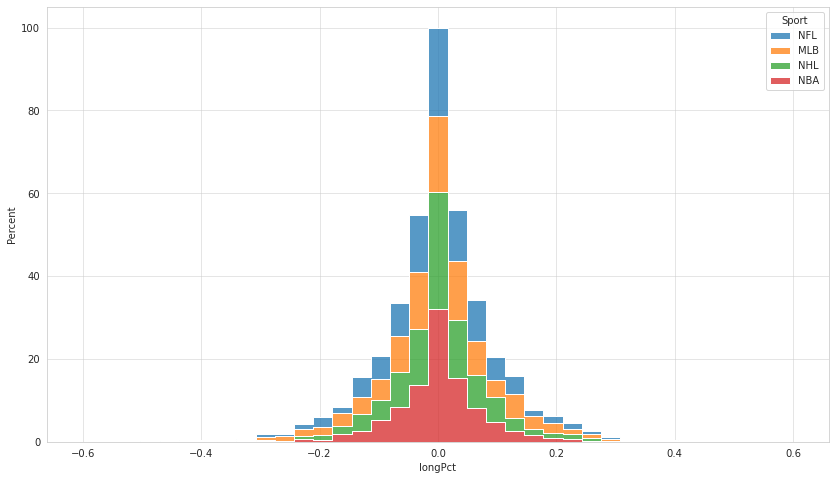

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,element='step',multiple='stack')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

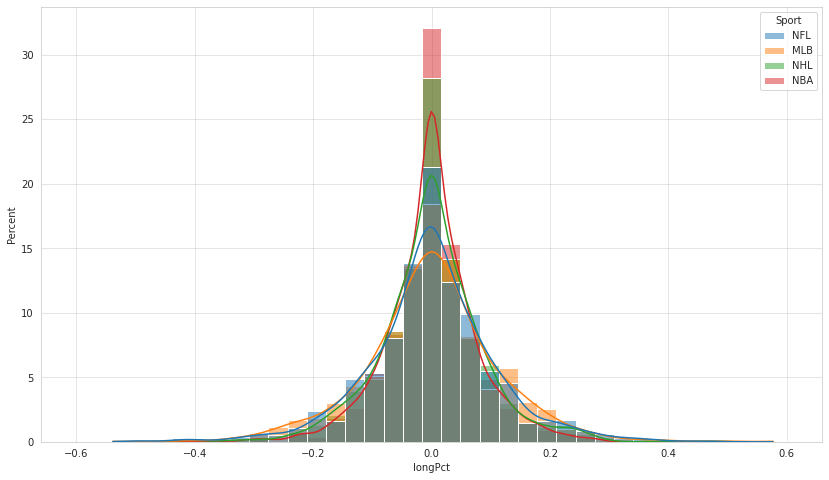

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",kde=True,common_norm=False,discrete=False,common_bins=True,fill=True,element='bars',multiple='layer')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

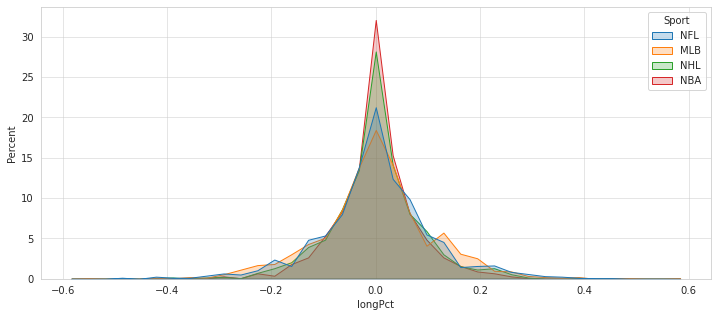

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=True,fill=True,element='poly',multiple='layer')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

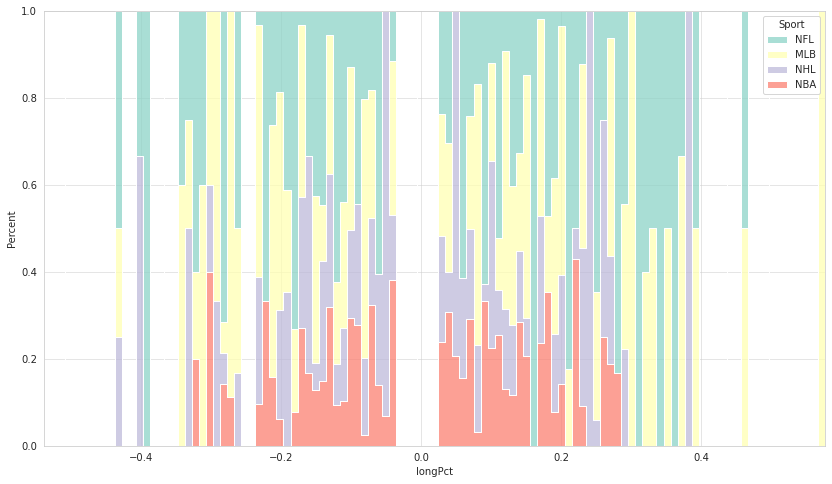

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=True,discrete=False,palette="Set3",common_bins=True,fill=True,element='step',multiple='fill')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

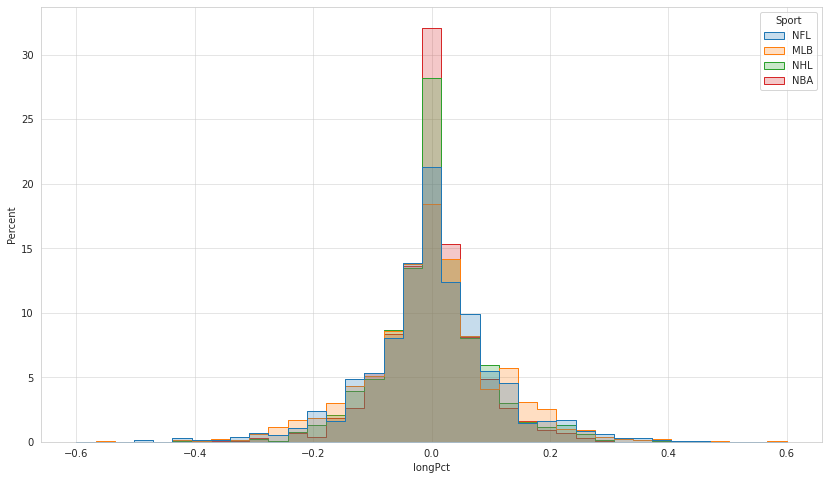

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,element='step')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

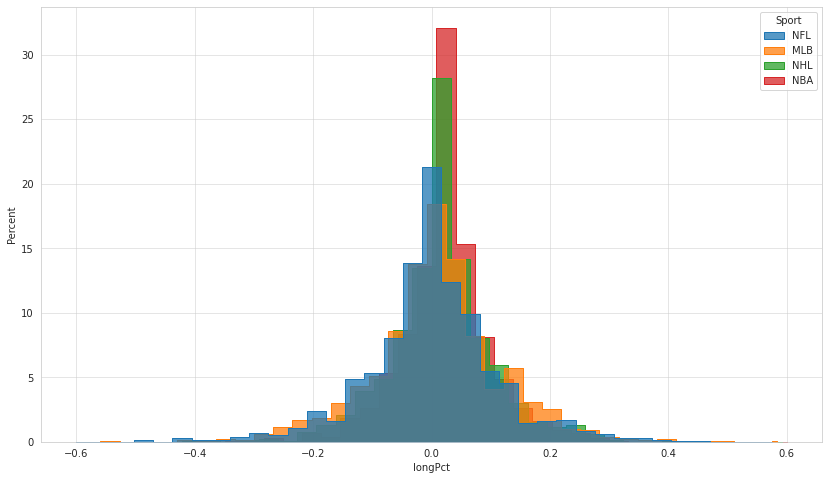

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,element='step',multiple='dodge')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

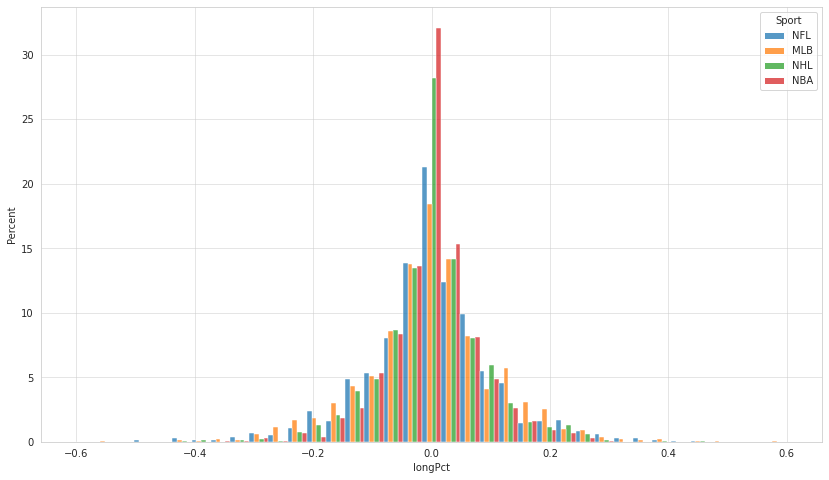

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=True,fill=True,element='bars',multiple='dodge')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

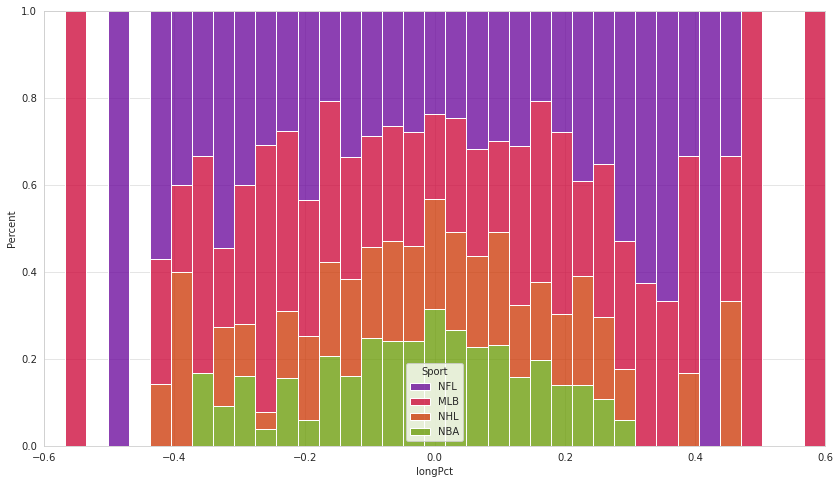

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=True,discrete=False,palette="brg",common_bins=True,fill=True,element='bars',multiple='fill')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

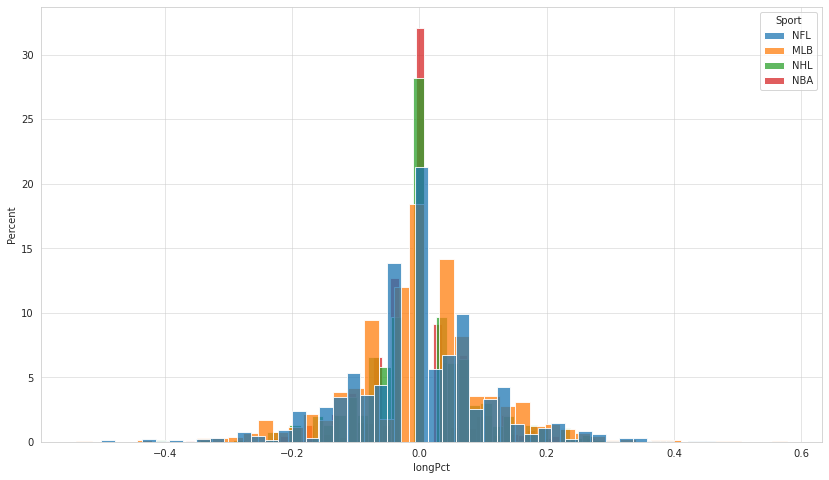

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,multiple="stack")

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

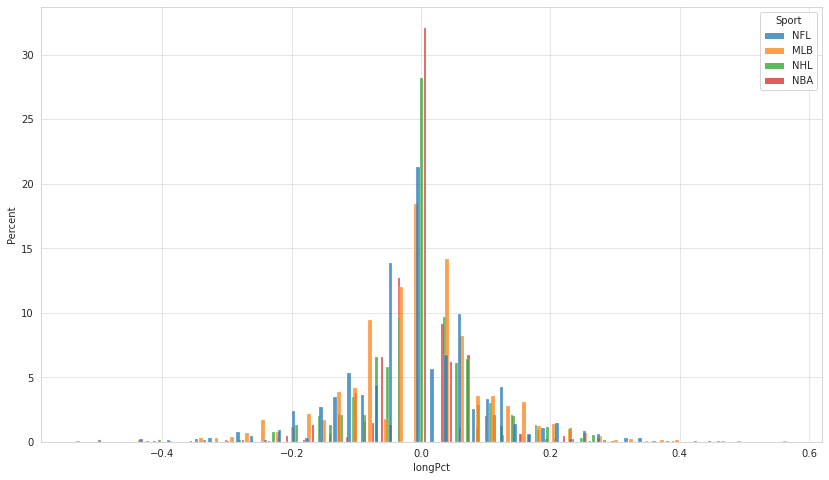

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,multiple="dodge")

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

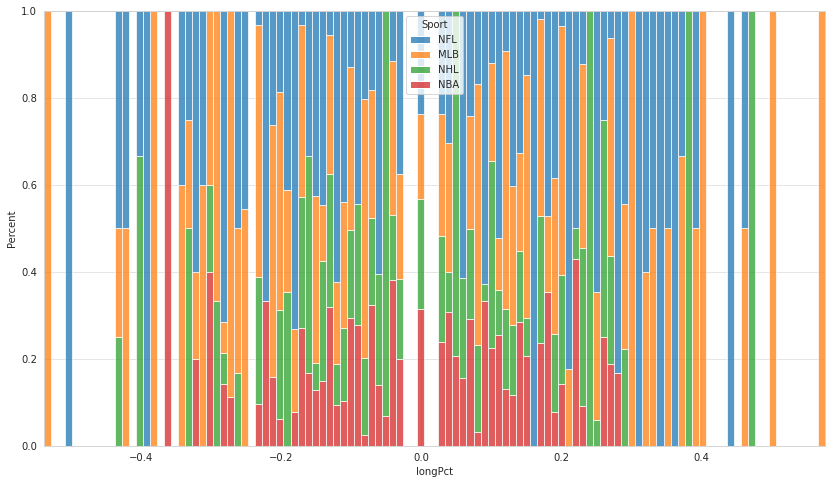

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=True,discrete=False,common_bins=True,fill=True,multiple="fill")

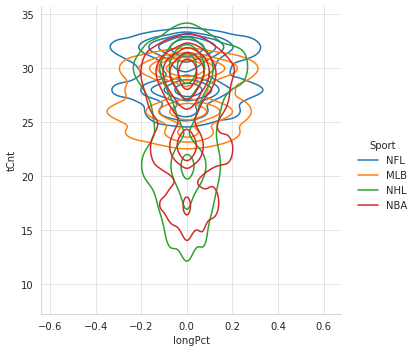

In [26]:
sns.displot(df_all,x="longPct",y="tCnt",hue="Sport",kind="kde",levels=6)

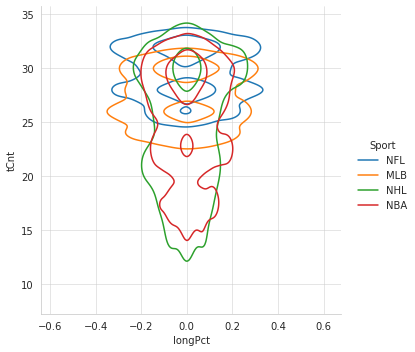

In [27]:
sns.displot(df_all,x="longPct",y="tCnt",hue="Sport",kind="kde",levels=3)

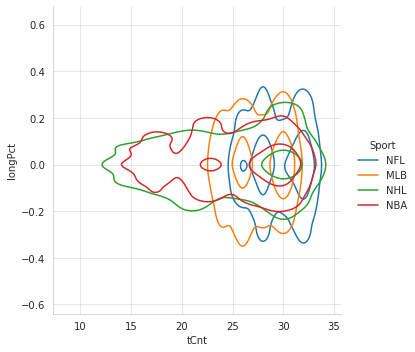

In [28]:
sns.displot(df_all,y="longPct",x="tCnt",hue="Sport",kind="kde",levels=3)

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

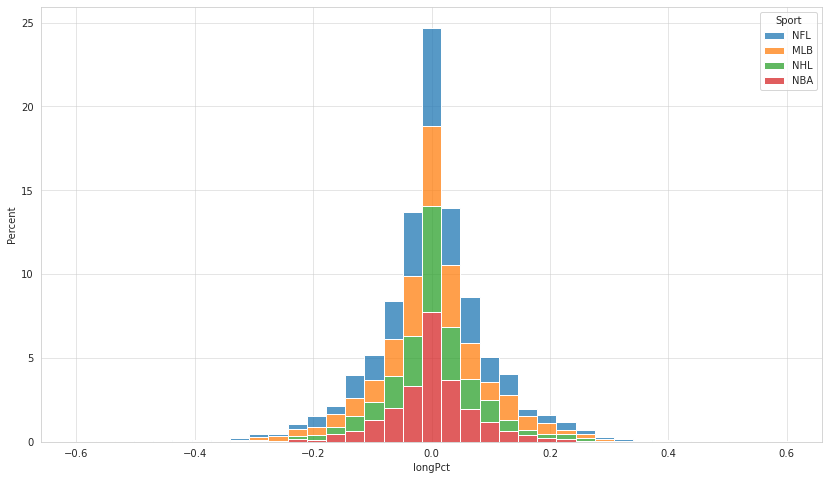

In [29]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",bins=HIST_BINS,fill=True,cbar=True,element='bars',multiple='stack')

'\nax5.plot([10,20],[12,24])\nax5.set_xlim([0, 30])\n'

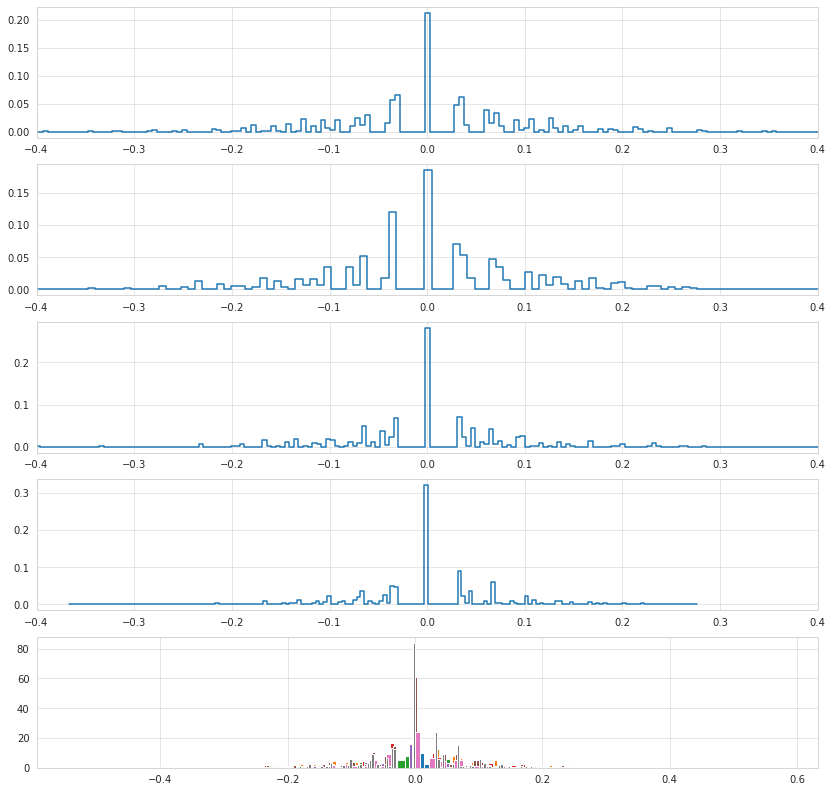

In [30]:
f = plt.figure(figsize=(14, 14))
ax1,ax2,ax3,ax4,ax5 = f.subplots(5, 1)

nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
#plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
#plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
ax1.plot(x,y)
ax1.set_xlim([-.4, .4])

nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
#plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
#plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
ax2.plot(x,y)
ax2.set_xlim([-.4, .4])

nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
#plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
#plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
ax3.plot(x,y)
ax3.set_xlim([-.4, .4])


nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
#plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
#plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
ax4.plot(x,y)
ax4.set_xlim([-.4, .4])

'''
ax5.plot([10,20],[12,24])
ax5.set_xlim([0, 30])
'''
